In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip show pillow

In [3]:
#!pip install pillow
#!pip install nvidia-ml-py3

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
bs = 64

In [6]:
data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 224, valid_pct= 0.15, seed = 42)

In [7]:
data

ImageDataBunch;

Train: LabelList (7663 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v4/Anime_Recogntn_Images;

Valid: LabelList (1352 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Neon_Genesis_Evangelion,Tengen_toppa_gurren_lagann,Tengen_toppa_gurren_lagann,Black_Lagoon,Hellsing_Ultimate
Path: data_v4/Anime_Recogntn_Images;

Test: None

In [8]:
path = Path('~./Anime_Project/data_v3_old/Anime_Recogntn_Images')
classes = data.classes
#classes
for c in classes:
    print(c)
    verify_images(path/c, delete=True, size = 500)

In [9]:
#doc(verify_images)

In [10]:
data

ImageDataBunch;

Train: LabelList (7663 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v4/Anime_Recogntn_Images;

Valid: LabelList (1352 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Neon_Genesis_Evangelion,Tengen_toppa_gurren_lagann,Tengen_toppa_gurren_lagann,Black_Lagoon,Hellsing_Ultimate
Path: data_v4/Anime_Recogntn_Images;

Test: None

- [ ] Try Transforms.
- [ ] Try Size. Warning triggered when size argument is omitted. data.show_batch errors out without the size argument.
- [ ] Are Data Augmentations and Transforms entirely different things? If yes try Augmentation too.
- [ ] Try Normalization.
### Results:
- Without Transform:
- With Transform:
<hr>
- Without Size:
- With Size (32) :

- [ ] Check fastai notebooks for usual CIFAR10 batch sizes. 
- Size 32 does not look great.
- Size = (16,16), (32,32), (64,64) are not great either. Why do the 32x32 images look bad when CIFAR10 images are 32x32.
- Size = (120,120), (150,150) seem better for the anime images at least.
- Images look bad because 32x32 is really really small.

### data.show_batch errors out when the image sizes are different.

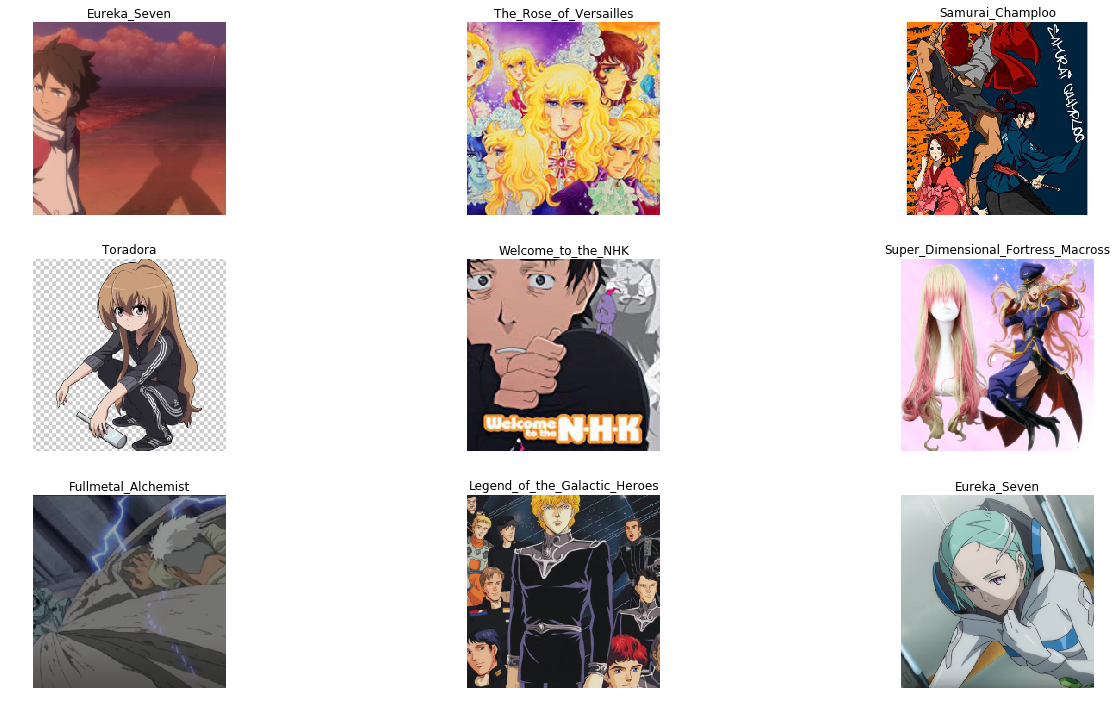

In [11]:
data.show_batch(rows=3, figsize=(20,10))

In [12]:
print(data.classes)
len(data.classes), data.c

['Akage_no_Anne', 'Baccano', 'Bakemonogatari', 'Berserk', 'Black_Lagoon', 'Blood_plus', 'Chobits', 'City_Hunter', 'Clannad', 'Claymore', 'Code_Geass_Lelouch_of_the_Rebellion', 'Cowboy_Bebop', 'Crest_of_the_Stars', 'Darker_Than_Black_Gemini_of_the_Meteor', 'Death_Note', 'Durarara', 'Ef_A_Tale_of_Memories', 'Elfen_Lied', 'Ergo_Proxy', 'Escaflowne', 'Eureka_Seven', 'FLCL', 'Fist_of_the_North_Star', 'Fullmetal_Alchemist', 'Future_Boy_Conan', 'Future_Diary', 'Gambling_Apocalypse_Kaiji', 'Ghost_in_the_Shell_Stand_Alone_Complex', 'Golden_Boy', 'Great_Teacher_Onizuka', 'Guardian_of_the_Sacred_Spirit', 'Gungrave', 'Haibane_renmei', 'Hajime_no_ippo', 'Hellsing_Ultimate', 'Hunter_x_Hunter', 'Inuyasha', 'JoJos_Bizarre_Adventure', 'Kaiba', 'Kaleido_Star', 'Katanagatari', 'Kimagure_Orange_Road', 'Kimi_ni_todoke', 'Koi_kaze', 'Legend_of_the_Galactic_Heroes', 'Les_Miserables_Shoujo_Cosette', 'Lupin_the_3rd', 'Maison_Ikkoku', 'Michiko_and_Hatchin', 'Mobile_Suit_Gundam', 'Mononoke', 'Monster', 'MushiShi

(100, 100)

In [13]:
"Nodame_Cantabile" in data.classes

True

In [14]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [15]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

epoch,train_loss,valid_loss,error_rate,time
0,4.102421,2.944839,0.654586,01:22
1,2.622886,2.066957,0.486686,01:26
2,1.814658,1.826995,0.434172,01:22
3,1.393299,1.794244,0.425296,01:22


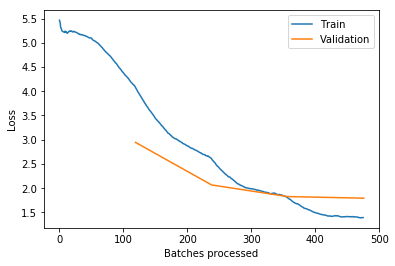

In [16]:
learn.fit_one_cycle(4)
learn.recorder.plot_losses()

## Error 1 and resolution:
### UnboundLocalError: local variable 'photoshop' referenced before assignment
### Known Pillow Error : https://stackoverflow.com/questions/56587941/unboundlocalerror-local-variable-photoshop-referenced-before-assignment
### Need to downgrade to Pillow 5.4.1, RE INSTALLED Pillow.
<hr>

## Error 2 and resolution:
### OSError: image file is truncated (107 bytes not processed)
### Known Pillow Error : https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
### Added two lines to import:
```python
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
```
<hr>

## Error 3 and resolution:
### AttributeError: 'PngStream' object has no attribute 'chunk_eXIf'
### Known Pillow Error : https://github.com/python-pillow/Pillow/issues/3557
### changed pillow version, installed nvidia-ml-py3:
```python
pip install pillow
pip install nvidia-ml-py3
```
<hr>

In [17]:
learn.save('stage-1-data_v3_1')

# Results:

We will now plot the images where the model was most confused.

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

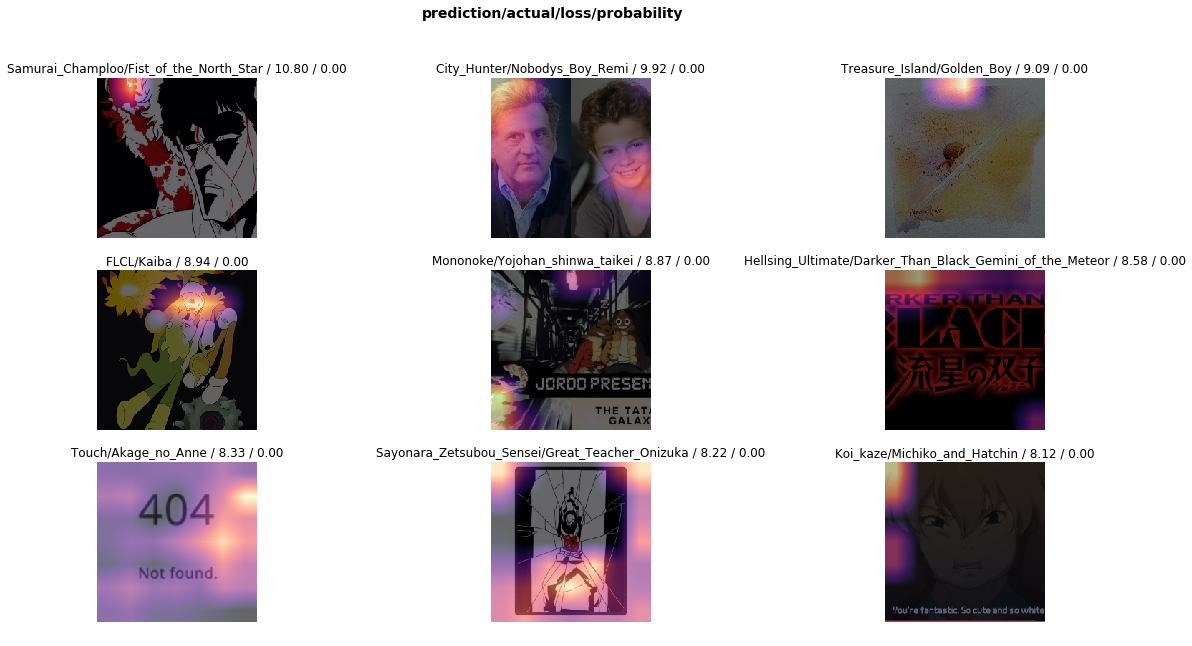

In [19]:
interp.plot_top_losses(9, figsize = (20,10))

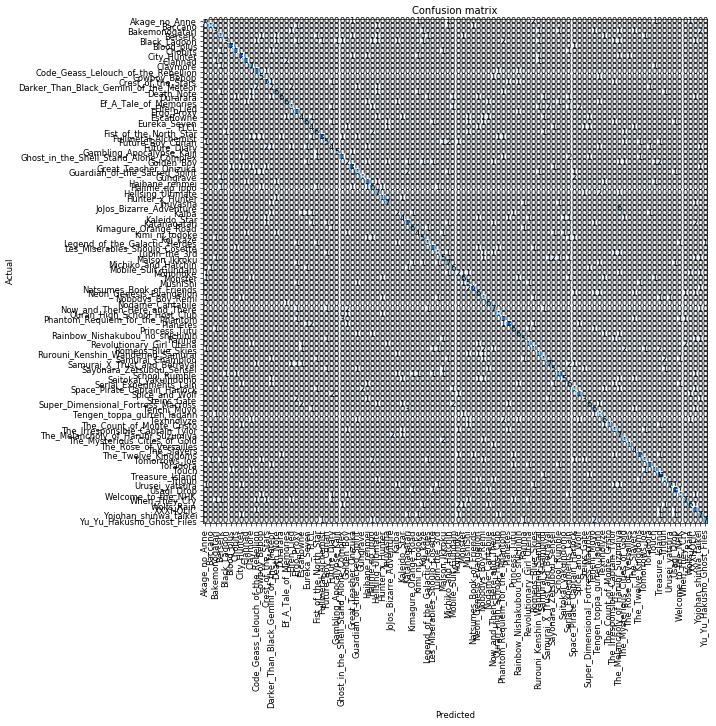

In [20]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [21]:
interp.most_confused(min_val=2)

[('JoJos_Bizarre_Adventure', 'The_Melancholy_of_Haruhi_Suzumiya', 6),
 ('Phantom_Requiem_for_the_Phantom',
  'Ghost_in_the_Shell_Stand_Alone_Complex',
  3),
 ('Tenchi_Muyo', 'Katanagatari', 3),
 ('Akage_no_Anne', 'Romeos_Blue_Skies', 2),
 ('Bakemonogatari', 'Yojohan_shinwa_taikei', 2),
 ('Black_Lagoon', 'Phantom_Requiem_for_the_Phantom', 2),
 ('Clannad', 'Ef_A_Tale_of_Memories', 2),
 ('Darker_Than_Black_Gemini_of_the_Meteor',
  'Code_Geass_Lelouch_of_the_Rebellion',
  2),
 ('Darker_Than_Black_Gemini_of_the_Meteor', 'Elfen_Lied', 2),
 ('Elfen_Lied', 'Samurai_X_Trust_and_Betrayal', 2),
 ('Elfen_Lied', 'Spice_and_Wolf', 2),
 ('Fist_of_the_North_Star', 'Hajime_no_ippo', 2),
 ('Future_Boy_Conan', 'Michiko_and_Hatchin', 2),
 ('Future_Diary', 'Crest_of_the_Stars', 2),
 ('Ghost_in_the_Shell_Stand_Alone_Complex', 'Serial_Experiments_Lain', 2),
 ('Golden_Boy', 'Treasure_Island', 2),
 ('Guardian_of_the_Sacred_Spirit', 'Katanagatari', 2),
 ('Gungrave', 'Space_Pirate_Captain_Harlock', 2),
 ('Hellsi

# Unfreezing, fine-tuning, and learning rates

If our model is working as expected, we will unfreeze our model and train some more.

In [22]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,1.281885,1.671180,0.401627,01:25
1,1.238981,2.007648,0.496302,01:24
2,1.305877,2.148261,0.500740,01:27
3,0.941583,1.914932,0.450444,01:28
4,0.501960,1.823782,0.406065,01:27
5,0.270594,1.777164,0.363166,01:27
6,0.129468,1.525396,0.338018,01:24
7,0.053305,1.403391,0.309172,01:24
8,0.027128,1.388154,0.294379,01:25
9,0.020326,1.373536,0.299556,01:25


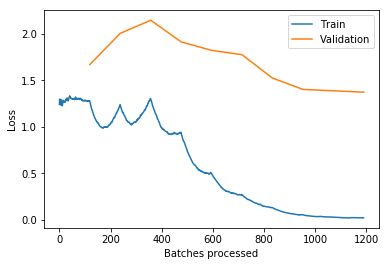

In [23]:
learn.fit_one_cycle(10)
learn.recorder.plot_losses()

In [24]:
learn.save('stage-1-data_v3_2')

In [25]:
#learn.load('stage-1-data_v3_1');

### Since post - unfreeze error is smaller, we'll use this learner.

In [26]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


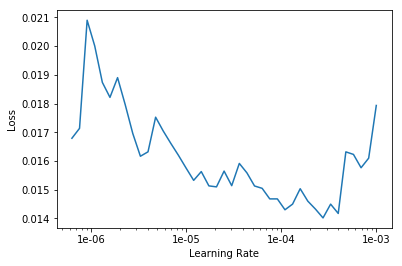

In [27]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.479708,2.043847,0.433432,01:22
1,0.211145,1.535836,0.334320,01:27


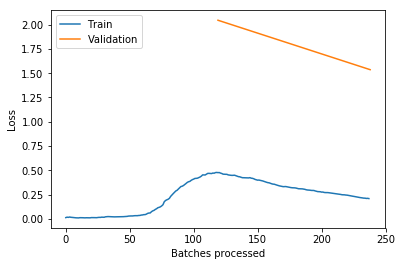

In [28]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))
learn.recorder.plot_losses()

In [29]:
learn.save('stage-1-data_v3_3')
#learn.load('stage-1-data_v3_1');

#  Trying resnet50 with bigger images and half the batch size:

In [30]:
data = ImageDataBunch.from_folder("./data_v4/Anime_Recogntn_Images/" , size = 300, valid_pct= 0.15, seed = 42, bs = bs//2)

### If the size parameter is set to say 64 instead of 200+ the network will not converge.

In [31]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


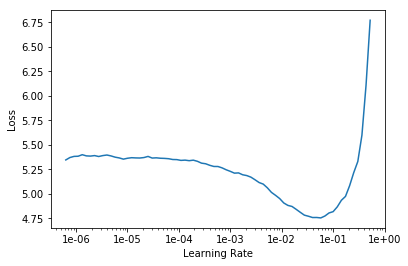

In [32]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,2.733265,1.966886,0.475592,01:44
1,2.437431,1.996697,0.495562,01:43
2,1.927457,1.687909,0.433432,01:45
3,1.642569,1.504316,0.385355,01:42
4,1.181695,1.287642,0.315089,01:45
5,0.672395,1.146629,0.269231,01:42
6,0.424113,1.112634,0.261095,01:43
7,0.259808,1.104106,0.259615,01:42


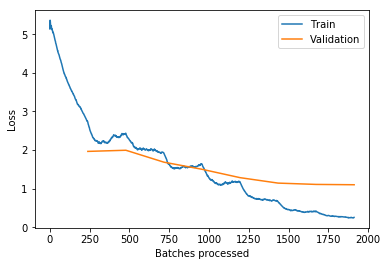

In [33]:
learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
learn.recorder.plot_losses()

### For above, the lowest error rate with max_lr=slice(1e-2,1e-1) is 79%.

In [34]:
learn.save('stage-1-50-data_v3_1')

In [35]:
learn.load('stage-1-50-data_v3_1')

Learner(data=ImageDataBunch;

Train: LabelList (7663 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v4/Anime_Recogntn_Images;

Valid: LabelList (1352 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Neon_Genesis_Evangelion,Tengen_toppa_gurren_lagann,Tengen_toppa_gurren_lagann,Black_Lagoon,Hellsing_Ultimate
Path: data_v4/Anime_Recogntn_Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), 

epoch,train_loss,valid_loss,error_rate,time
0,1.827243,3.288441,0.625000,01:47
1,2.476993,2.948766,0.687130,01:46
2,2.553583,3.786890,0.769970,01:44
3,2.609814,2.746655,0.670858,01:45
4,2.437133,2.584931,0.631657,01:47
5,2.174724,2.734713,0.621302,01:44
6,1.793209,2.249854,0.521450,01:47
7,1.478572,2.100760,0.504438,01:48
8,1.157407,2.086026,0.463018,01:47
9,0.780238,1.701029,0.397189,01:44


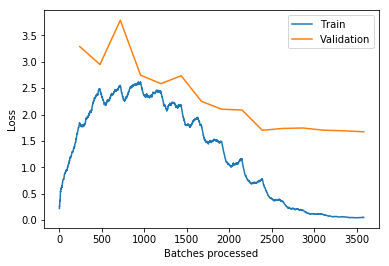

In [36]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-3,1e-2))
learn.recorder.plot_losses()

<hr>

### Trial 1:
Arch = Resnet50 <br>
Error = 24.29% <br>
Size = 250 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
lr= max_lr=slice(1e-4,1e-3) (Initial frozen epochs lr unspecified) <br>
<hr>

<hr>

### Trial 2:
Arch = Resnet50 <br>
Error = __ <br>
Size = 300 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
lr= max_lr=slice(1e-4,1e-3) (Initial frozen epochs max_r=slice(1e-3,1e-2)) <br>
<hr>

In [37]:
learn.save('stage-1-50-data_v3_2')

In [38]:
learn.load('stage-1-50-data_v3_1')

Learner(data=ImageDataBunch;

Train: LabelList (7663 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v4/Anime_Recogntn_Images;

Valid: LabelList (1352 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Neon_Genesis_Evangelion,Tengen_toppa_gurren_lagann,Tengen_toppa_gurren_lagann,Black_Lagoon,Hellsing_Ultimate
Path: data_v4/Anime_Recogntn_Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), 

epoch,train_loss,valid_loss,error_rate,time
0,0.329515,1.175143,0.271450,01:47
1,0.704069,1.657462,0.372781,01:45
2,1.150962,1.715621,0.389053,01:45
3,1.202128,1.655925,0.366864,01:46
4,0.889146,1.498665,0.353550,01:46
5,0.681882,1.499224,0.351331,01:46
6,0.478124,1.477095,0.344675,01:45
7,0.303600,1.323531,0.301035,01:46
8,0.179022,1.220856,0.281805,01:44
9,0.118515,1.152045,0.266272,01:43


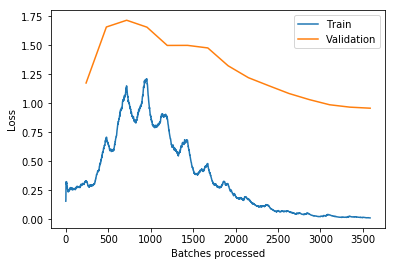

In [39]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))
learn.recorder.plot_losses()

### Trial 2:
Arch = Resnet50 <br>
Error = 23.83 <br>
Size = 300 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
<hr>

In [ ]:
learn.save('stage-1-50-data_v3_3_23_83_percent_error')

In [ ]:
learn.load('stage-1-50-data_v3_3')